# Setup and data preproccesing

Check python and pip version. Must be **Python 3.10**!!!

In [1]:
!python --version
!pip --version

Python 3.10.13
pip 23.2.1 from /home/jakob/.cache/pypoetry/virtualenvs/machine-learning-exam-dnZALQ3X-py3.10/lib/python3.10/site-packages/pip (python 3.10)


Mount Google drive

In [2]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
nb_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Machine learning/packages', nb_path)
sys.path.insert(0, nb_path)

Mounted at /content/drive


Install python libraries dependencies. Should only be done **once** (non-executable cell)!

```
!pip install --target=$nb_path pycaret[full] torch torchvision torchaudio
```

Load raw data

In [3]:
import os
import pandas as pd
pd.options.display.max_columns = None

data_path = "data"
raw_data = {
    "A": {
        "test_est": pd.read_parquet(os.path.join(data_path, "A", "X_test_estimated.parquet")),
        "train_est": pd.read_parquet(os.path.join(data_path, "A", "X_train_estimated.parquet")),
        "train_obs": pd.read_parquet(os.path.join(data_path, "A", "X_train_observed.parquet")),
        "train_tar": pd.read_parquet(os.path.join(data_path, "A", "train_targets.parquet")),
    },
    "B": {
        "test_est": pd.read_parquet(os.path.join(data_path, "B", "X_test_estimated.parquet")),
        "train_est": pd.read_parquet(os.path.join(data_path, "B", "X_train_estimated.parquet")),
        "train_obs": pd.read_parquet(os.path.join(data_path, "B", "X_train_observed.parquet")),
        "train_tar": pd.read_parquet(os.path.join(data_path, "B", "train_targets.parquet")),
    },
    "C": {
        "test_est": pd.read_parquet(os.path.join(data_path, "C", "X_test_estimated.parquet")),
        "train_est": pd.read_parquet(os.path.join(data_path, "C", "X_train_estimated.parquet")),
        "train_obs": pd.read_parquet(os.path.join(data_path, "C", "X_train_observed.parquet")),
        "train_tar": pd.read_parquet(os.path.join(data_path, "C", "train_targets.parquet")),
    },
}

View data

In [4]:
raw_data["C"]["test_est"]

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2023-04-30 07:00:04,2023-05-01 00:00:00,4.2,1.286,NaN,0.0,0.0,1178.000000,0.0,271.100006,0.0,0.0,0.0,0.0,73.699997,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.000000,0.0,0.0,998.200012,1004.500000,0.0,0.0,81.099998,1010.799988,NaN,0.0,0.0,0.0,0.0,10.519000,-11.223,0.0,273.700012,73.699997,31411.000000,3.5,1.5,3.1,-0.0
1,2023-04-30 07:00:04,2023-05-01 00:15:00,4.2,1.286,NaN,0.0,0.0,1217.000000,0.0,271.100006,0.0,0.0,0.0,0.0,70.800003,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.799988,0.0,0.0,998.099976,1004.299988,0.0,0.0,81.000000,1010.599976,NaN,0.0,0.0,0.0,0.0,14.202000,-10.862,0.0,273.700012,70.800003,31295.800781,3.4,1.5,3.1,-0.0
2,2023-04-30 07:00:04,2023-05-01 00:30:00,4.1,1.286,NaN,0.0,0.0,1256.000000,0.0,271.000000,0.0,0.0,0.0,0.0,67.900002,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.700012,0.0,0.0,998.000000,1004.200012,0.0,0.0,80.900002,1010.500000,NaN,0.0,0.0,0.0,0.0,17.868000,-10.397,0.0,273.700012,67.900002,31178.599609,3.4,1.4,3.1,-0.0
3,2023-04-30 07:00:04,2023-05-01 00:45:00,4.1,1.286,NaN,0.0,0.0,1295.000000,0.0,270.899994,0.0,0.0,0.0,0.0,64.800003,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.599976,0.0,0.0,997.799988,1004.099976,0.0,0.0,80.800003,1010.400024,NaN,0.0,0.0,0.0,0.0,21.513000,-9.830,0.0,273.700012,64.800003,31082.500000,3.4,1.4,3.1,-0.0
4,2023-04-30 07:00:04,2023-05-01 01:00:00,4.1,1.286,NaN,0.0,0.0,1334.099976,0.0,270.899994,0.0,0.0,0.0,0.0,61.599998,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.400024,0.0,0.0,997.700012,1004.000000,0.0,0.0,80.599998,1010.299988,NaN,0.0,0.0,0.0,0.0,25.134001,-9.163,0.0,273.700012,61.599998,31051.400391,3.4,1.4,3.1,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,2023-07-02 07:00:31,2023-07-03 22:45:00,9.0,1.207,2003.500000,0.0,0.0,1573.000000,0.0,282.600006,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.400024,0.0,0.0,978.799988,984.700012,0.0,0.0,84.000000,990.599976,NaN,0.0,0.0,-0.0,0.0,351.852997,-3.320,0.1,285.299988,100.000000,39008.300781,1.8,1.6,-0.7,0.0
2876,2023-07-02 07:00:31,2023-07-03 23:00:00,9.0,1.207,2005.599976,0.0,0.0,1471.000000,0.0,282.500000,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.500000,0.0,0.0,978.799988,984.700012,0.0,0.0,84.099998,990.700012,NaN,0.0,0.0,-0.0,0.0,355.315002,-3.508,0.1,285.200012,100.000000,39026.000000,1.7,1.6,-0.7,0.0
2877,2023-07-02 07:00:31,2023-07-03 23:15:00,9.0,1.207,2005.500000,0.0,0.0,1346.900024,0.0,282.500000,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.500000,0.0,0.0,978.900024,984.799988,0.0,0.0,84.400002,990.700012,NaN,0.0,0.0,-0.0,0.0,358.782013,-3.594,0.1,285.100006,100.000000,39081.300781,1.7,1.6,-0.6,0.0
2878,2023-07-02 07:00:31,2023-07-03 23:30:00,8.9,1.207,2005.500000,0.0,0.0,1222.800049,0.0,282.500000,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.599976,0.0,0.0,979.000000,984.900024,0.0,0.0,84.800003,990.799988,NaN,0.0,0.0,-0.0,0.0,2.250000,-3.579,0.2,285.100006,100.000000,39145.101562,1.7,1.6,-0.6,0.0


In [5]:
raw_data["C"]["train_est"]

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2022-10-27 07:00:18,2022-10-28 22:00:00,8.3,1.231,1427.400024,0.0,0.0,1215.800049,1.0,281.200012,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1001.099976,0.0,0.0,986.000000,992.000000,0.0,0.0,93.900002,998.099976,NaN,0.0,0.0,-0.0,0.4,340.785004,-38.502998,0.0,285.200012,100.000000,34387.398438,1.2,-0.3,1.1,-0.0
1,2022-10-27 07:00:18,2022-10-28 22:15:00,8.3,1.231,2089.000000,0.0,0.0,1425.900024,1.0,281.200012,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.700012,0.0,0.0,985.700012,991.700012,0.0,0.0,93.599998,997.700012,NaN,0.0,0.0,-0.0,0.5,345.440002,-38.992001,0.0,285.100006,100.000000,27418.500000,1.2,-0.2,1.2,-0.0
2,2022-10-27 07:00:18,2022-10-28 22:30:00,8.3,1.231,2750.500000,0.0,0.0,1636.099976,1.0,281.100006,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.400024,0.0,0.0,985.400024,991.400024,0.0,0.1,93.300003,997.400024,NaN,0.0,0.0,-0.0,0.5,350.144012,-39.348000,0.0,285.100006,100.000000,20508.800781,1.2,-0.1,1.2,-0.0
3,2022-10-27 07:00:18,2022-10-28 22:45:00,8.2,1.230,3412.100098,0.0,0.0,1846.199951,1.0,281.100006,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.099976,0.0,0.0,985.099976,991.099976,0.0,0.1,93.000000,997.099976,NaN,0.0,0.0,-0.0,0.5,354.880005,-39.567001,0.0,285.000000,100.000000,13657.799805,1.2,-0.0,1.2,-0.0
4,2022-10-27 07:00:18,2022-10-28 23:00:00,8.2,1.230,4073.699951,0.0,0.0,2056.399902,1.0,281.100006,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,999.700012,0.0,0.0,984.700012,990.700012,0.0,0.1,92.699997,996.799988,NaN,0.0,0.0,-0.0,0.6,359.634003,-39.647999,0.0,285.000000,100.000000,6865.000000,1.2,0.1,1.2,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17571,2023-04-29 07:00:05,2023-04-30 22:45:00,4.4,1.280,1034.599976,0.0,0.0,562.299988,0.0,272.000000,0.0,0.0,0.0,0.0,99.800003,24.0,0.0,0.0,0.4,0.0,0.0,0.0,1.0,1014.400024,0.0,0.0,998.599976,1004.900024,0.0,0.0,80.000000,1011.099976,NaN,0.0,0.0,-0.0,0.1,352.915985,-11.769000,0.2,274.200012,99.900002,10681.200195,3.0,2.1,2.2,-0.0
17572,2023-04-29 07:00:05,2023-04-30 23:00:00,4.4,1.280,897.200012,0.0,0.0,569.500000,0.0,272.000000,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.400024,0.0,0.0,998.500000,1004.799988,0.0,0.0,80.400002,1011.099976,NaN,0.0,0.0,-0.0,0.1,356.630005,-11.923000,0.2,274.100006,100.000000,9890.900391,2.8,1.9,2.1,-0.0
17573,2023-04-29 07:00:05,2023-04-30 23:15:00,4.4,1.280,1288.699951,0.0,0.0,562.299988,0.0,272.000000,0.0,0.0,0.0,0.0,99.699997,24.0,0.0,0.0,0.4,0.0,0.0,0.0,1.0,1014.200012,0.0,0.0,998.400024,1004.700012,0.0,0.0,80.099998,1010.900024,NaN,0.0,0.0,-0.0,0.1,0.349000,-11.967000,0.1,274.200012,100.000000,10716.799805,2.9,1.9,2.2,-0.0
17574,2023-04-29 07:00:05,2023-04-30 23:30:00,4.4,1.280,1680.300049,0.0,0.0,555.099976,0.0,271.899994,0.0,0.0,0.0,0.0,99.000000,24.0,0.0,0.0,0.4,0.0,0.0,0.0,1.0,1014.099976,0.0,0.0,998.299988,1004.500000,0.0,0.0,79.800003,1010.799988,NaN,0.0,0.0,-0.0,0.1,4.067000,-11.902000,0.1,274.200012,99.800003,11538.799805,3.0,1.9,2.3,-0.0


In [6]:
raw_data["C"]["train_obs"]

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2019-01-01 00:00:00,5.6,1.240,1153.599976,0.0,0.0,1153.599976,1.0,275.200012,0.0,0.0,0.0,0.0,63.599998,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,987.299988,0.00,0.0,972.599976,978.599976,0.0,0.0,90.199997,984.700012,NaN,0.0,0.0,-0.0,0.0,12.989000,-49.178001,0.0,278.500000,68.500000,18220.400391,2.5,1.1,2.2,-0.0
1,2019-01-01 00:15:00,5.5,1.241,1137.900024,0.0,0.0,1137.900024,1.0,275.100006,0.0,0.0,0.0,0.0,74.900002,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,987.099976,0.06,1.0,972.299988,978.299988,0.2,0.0,90.000000,984.400024,NaN,0.0,0.0,-0.0,0.0,18.214001,-48.724998,0.0,278.399994,80.800003,17083.699219,2.8,1.1,2.5,-0.0
2,2019-01-01 00:30:00,5.4,1.241,1122.199951,0.0,0.0,1122.199951,1.0,274.899994,0.0,0.0,0.0,0.0,84.300003,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986.799988,0.06,1.0,972.000000,978.000000,0.3,0.0,89.900002,984.099976,NaN,0.0,0.0,-0.0,0.1,23.351000,-48.127998,0.0,278.299988,89.900002,15940.900391,3.0,1.1,2.8,-0.0
3,2019-01-01 00:45:00,5.4,1.241,1106.400024,0.0,0.0,1106.400024,1.0,274.700012,0.0,0.0,0.0,0.0,92.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986.599976,0.06,1.0,971.700012,977.799988,0.3,0.0,89.699997,983.799988,NaN,0.0,0.0,-0.0,0.1,28.382000,-47.393002,0.0,278.200012,96.099998,14792.000000,3.3,1.2,3.0,-0.0
4,2019-01-01 01:00:00,5.3,1.241,1090.599976,0.0,0.0,1090.599976,1.0,274.500000,0.0,0.0,0.0,0.0,98.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986.400024,0.06,1.0,971.400024,977.500000,0.4,0.0,89.599998,983.599976,NaN,0.0,0.0,-0.0,0.1,33.292999,-46.529999,0.0,278.100006,99.400002,13637.299805,3.5,1.2,3.3,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116820,2022-05-01 21:00:00,4.9,1.257,2652.000000,0.0,0.0,1536.500000,0.0,273.600006,0.0,0.0,0.0,0.0,95.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.799988,0.00,0.0,999.299988,1005.400024,0.0,0.0,62.599998,1011.599976,NaN,0.0,0.0,-0.0,0.0,327.303009,-7.367000,0.0,279.299988,100.000000,38312.000000,4.7,3.0,3.6,-0.0
116821,2022-05-01 21:15:00,4.9,1.256,2375.300049,0.0,0.0,1484.500000,0.0,273.600006,0.0,0.0,0.0,0.0,97.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.500000,0.00,0.0,999.000000,1005.099976,0.0,0.0,62.799999,1011.299988,NaN,0.0,0.0,-0.0,0.0,330.863007,-8.232000,0.1,279.299988,100.000000,38344.199219,4.8,3.2,3.6,-0.0
116822,2022-05-01 21:30:00,4.9,1.256,2098.699951,0.0,0.0,1432.500000,0.0,273.500000,0.0,0.0,0.0,0.0,98.500000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.200012,0.00,0.0,998.599976,1004.799988,0.0,0.0,63.000000,1010.900024,NaN,0.0,0.0,-0.0,0.0,334.451996,-9.006000,0.1,279.200012,100.000000,38402.601562,4.9,3.3,3.6,-0.0
116823,2022-05-01 21:45:00,4.8,1.255,1822.000000,0.0,0.0,1380.400024,0.0,273.399994,0.0,0.0,0.0,0.0,99.500000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.900024,0.00,0.0,998.299988,1004.400024,0.0,0.0,63.200001,1010.599976,NaN,0.0,0.0,-0.0,0.0,338.067993,-9.683000,0.1,279.200012,100.000000,38478.800781,5.0,3.5,3.6,-0.0


In [7]:
raw_data["C"]["train_tar"]

,time,pv_measurement
0,2018-12-31 23:00:00,NaN
1,2019-01-01 00:00:00,NaN
2,2019-01-01 01:00:00,NaN
3,2019-01-01 02:00:00,NaN
4,2019-01-01 03:00:00,NaN
...,...,...
32150,2023-04-30 19:00:00,50.96
32151,2023-04-30 20:00:00,2.94
32152,2023-04-30 21:00:00,0.00
32153,2023-04-30 22:00:00,-0.00


Preproccess data

In [8]:
location_train_data = []
location_test_data = []

for k in raw_data:
    raw_data[k]["train_obs"]["forecast_seconds"] = 0
    raw_data[k]["train_est"]["forecast_seconds"] = (raw_data[k]["train_est"]["date_forecast"] - raw_data[k]["train_est"]["date_calc"]).apply(lambda x: x.total_seconds())
    del raw_data[k]["train_est"]["date_calc"]
    raw_data[k]["test_est"]["forecast_seconds"] = (raw_data[k]["test_est"]["date_forecast"] - raw_data[k]["test_est"]["date_calc"]).apply(lambda x: x.total_seconds())
    del raw_data[k]["test_est"]["date_calc"]

    raw_data[k]["train_obs"]["location"] = k
    raw_data[k]["train_est"]["location"] = k
    raw_data[k]["test_est"]["location"] = k

    location_train_data.append(pd.merge(
        pd.concat([
            raw_data[k]["train_obs"].rename(columns={"date_forecast": "time"}),
            raw_data[k]["train_est"].rename(columns={"date_forecast": "time"}),
        ]),
        raw_data[k]["train_tar"],
        on="time"
    ))
    location_test_data.append(raw_data[k]["test_est"].rename(columns={"date_forecast": "time"}))

train_data = pd.concat(location_train_data).dropna(subset=["pv_measurement"]).reset_index()
test_data = pd.concat(location_test_data).reset_index()

In [9]:
train_data

,index,time,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,forecast_seconds,location,pv_measurement
0,0,2019-06-02 22:00:00,7.7,1.230,1744.900024,0.000000,0.0,1744.900024,0.0,280.299988,0.0,0.000000,0.0,0.000000,98.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.799988,0.0,0.0,994.200012,1000.299988,0.0,0.0,73.099998,1006.299988,NaN,0.0,0.0,-0.0,0.1,342.834015,-3.202,0.0,285.899994,100.000000,39640.101562,3.7,-3.6,-0.8,-0.0,0.0,A,0.00
1,1,2019-06-02 23:00:00,7.7,1.225,1703.599976,0.000000,0.0,1703.599976,0.0,280.299988,0.0,0.000000,0.0,0.000000,99.599998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.500000,0.0,0.0,993.000000,999.000000,0.0,0.0,69.199997,1005.000000,NaN,0.0,0.0,-0.0,0.2,356.742004,-4.393,0.0,286.799988,100.000000,41699.898438,3.5,-3.5,0.0,-0.0,0.0,A,0.00
2,2,2019-06-03 00:00:00,7.7,1.221,1668.099976,0.000000,0.0,1668.099976,0.0,280.200012,0.0,0.000000,0.0,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1004.599976,0.0,0.0,992.099976,998.099976,0.0,0.1,66.000000,1004.099976,NaN,0.0,0.0,-0.0,0.2,9.741000,-3.910,0.0,287.000000,100.000000,20473.000000,3.2,-3.1,0.7,-0.0,0.0,A,0.00
3,3,2019-06-03 01:00:00,8.2,1.218,1388.400024,0.000000,0.0,1388.400024,0.0,281.299988,0.0,0.000000,0.0,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1004.400024,0.0,0.0,991.799988,997.799988,0.0,0.2,71.099998,1003.799988,NaN,0.0,0.0,-0.0,0.7,23.541000,-1.986,0.0,286.899994,100.000000,2104.600098,2.8,-2.7,0.8,-0.0,0.0,A,0.00
4,4,2019-06-03 02:00:00,8.8,1.219,1108.500000,6546.899902,9.8,1108.500000,0.0,282.299988,4.3,7743.299805,0.0,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1003.400024,0.0,0.0,990.900024,996.900024,0.0,0.1,78.500000,1002.900024,NaN,0.0,0.0,-0.0,0.3,37.040001,1.401,0.0,286.500000,100.000000,2681.600098,2.7,-2.5,1.0,-0.0,0.0,A,19.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92946,32125,2023-04-30 19:00:00,4.4,1.274,1474.199951,156770.703125,13.4,557.000000,0.0,272.100006,8.8,92814.796875,0.0,27407.300781,98.599998,24.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1014.900024,0.0,0.0,999.000000,1005.200012,0.0,0.0,73.500000,1011.500000,NaN,0.0,0.0,-0.0,0.0,299.897003,1.895,0.0,275.100006,98.599998,27493.599609,4.3,3.9,1.8,-0.0,129595.0,C,50.96
92947,32126,2023-04-30 20:00:00,4.4,1.278,1427.300049,7917.100098,0.0,541.700012,0.0,272.000000,0.0,15757.299805,0.0,0.000000,97.400002,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.900024,0.0,0.0,999.099976,1005.299988,0.0,0.0,76.900002,1011.599976,NaN,0.0,0.0,-0.0,0.0,313.417999,-3.498,0.0,274.600006,97.400002,20912.300781,3.6,3.1,1.9,-0.0,133195.0,C,2.94
92948,32127,2023-04-30 21:00:00,4.4,1.279,1558.099976,0.000000,0.0,601.500000,0.0,271.899994,0.0,0.000000,0.0,0.000000,92.099998,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.700012,0.0,0.0,998.900024,1005.200012,0.0,0.0,77.099998,1011.400024,NaN,0.0,0.0,-0.0,0.0,327.394989,-7.784,0.0,274.500000,93.800003,29107.699219,3.6,2.7,2.4,-0.0,136795.0,C,0.00
92949,32128,2023-04-30 22:00:00,4.4,1.279,1446.599976,0.000000,0.0,540.700012,0.0,271.899994,0.0,0.000000,0.0,0.000000,96.500000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.599976,0.0,0.0,998.799988,1005.099976,0.0,0.0,78.800003,

In [10]:
test_data

,index,time,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,forecast_seconds,location
0,0,2023-05-01 00:00:00,4.4,1.286,912.700012,0.0,0.0,1041.199951,0.0,271.700012,0.0,0.0,0.0,0.0,80.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.900024,0.0,0.0,1000.700012,1007.000000,0.0,0.0,80.300003,1013.299988,NaN,0.0,0.0,0.0,0.0,10.520000,-11.185,0.0,273.799988,80.699997,30210.699219,4.0,2.2,3.4,-0.0,61196.0,A
1,1,2023-05-01 00:15:00,4.3,1.287,912.700012,0.0,0.0,1054.800049,0.0,271.700012,0.0,0.0,0.0,0.0,77.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.700012,0.0,0.0,1000.599976,1006.900024,0.0,0.0,80.300003,1013.200012,NaN,0.0,0.0,0.0,0.0,14.203000,-10.825,0.0,273.799988,77.000000,30003.599609,4.0,2.1,3.4,-0.0,62096.0,A
2,2,2023-05-01 00:30:00,4.3,1.287,912.700012,0.0,0.0,1068.300049,0.0,271.600006,0.0,0.0,0.0,0.0,73.099998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.599976,0.0,0.0,1000.500000,1006.700012,0.0,0.0,80.300003,1013.000000,NaN,0.0,0.0,0.0,0.0,17.868999,-10.360,0.0,273.799988,73.099998,29797.099609,3.9,2.1,3.3,-0.0,62996.0,A
3,3,2023-05-01 00:45:00,4.3,1.287,912.700012,0.0,0.0,1081.900024,0.0,271.600006,0.0,0.0,0.0,0.0,69.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.500000,0.0,0.0,1000.400024,1006.599976,0.0,0.0,80.199997,1012.900024,NaN,0.0,0.0,0.0,0.0,21.514000,-9.794,0.0,273.799988,69.000000,29618.599609,3.9,2.0,3.3,-0.0,63896.0,A
4,4,2023-05-01 01:00:00,4.3,1.287,NaN,0.0,0.0,1095.400024,0.0,271.600006,0.0,0.0,0.0,0.0,64.500000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.299988,0.0,0.0,1000.200012,1006.500000,0.0,0.0,80.199997,1012.799988,NaN,0.0,0.0,0.0,0.0,25.135000,-9.128,0.0,273.799988,64.500000,29507.500000,3.9,2.0,3.3,-0.0,64796.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,2875,2023-07-03 22:45:00,9.0,1.207,2003.500000,0.0,0.0,1573.000000,0.0,282.600006,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.400024,0.0,0.0,978.799988,984.700012,0.0,0.0,84.000000,990.599976,NaN,0.0,0.0,-0.0,0.0,351.852997,-3.320,0.1,285.299988,100.000000,39008.300781,1.8,1.6,-0.7,0.0,143069.0,C
8636,2876,2023-07-03 23:00:00,9.0,1.207,2005.599976,0.0,0.0,1471.000000,0.0,282.500000,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.500000,0.0,0.0,978.799988,984.700012,0.0,0.0,84.099998,990.700012,NaN,0.0,0.0,-0.0,0.0,355.315002,-3.508,0.1,285.200012,100.000000,39026.000000,1.7,1.6,-0.7,0.0,143969.0,C
8637,2877,2023-07-03 23:15:00,9.0,1.207,2005.500000,0.0,0.0,1346.900024,0.0,282.500000,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.500000,0.0,0.0,978.900024,984.799988,0.0,0.0,84.400002,990.700012,NaN,0.0,0.0,-0.0,0.0,358.782013,-3.594,0.1,285.100006,100.000000,39081.300781,1.7,1.6,-0.6,0.0,144869.0,C
8638,2878,2023-07-03 23:30:00,8.9,1.207,2005.500000,0.0,0.0,1222.800049,0.0,282.500000,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.599976,0.0,0.0,979.000000,984.900024,0.0,0.0,84.800003,990.799988,NaN,0.0,0.0,-0.0,0.0,2.250000,-3.579,0.2,285.100006,100.000000,39145.101562,1.7,1.6,-0.6,0.0,145769.0,C


Analyse train data

In [11]:
train_data.describe()

,index,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,forecast_seconds,pv_measurement
count,92951.000000,92951.000000,92951.000000,72276.000000,9.295100e+04,92951.000000,84404.000000,92951.000000,92951.000000,92951.000000,9.295100e+04,92951.000000,9.295100e+04,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,4176.0,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000
mean,17353.821196,6.017608,1.255435,2802.587891,5.151540e+05,143.101395,1692.934692,0.007025,275.237823,39.495811,1.421800e+05,50.205017,1.807402e+05,67.013527,11.401738,0.116175,0.009630,0.229894,0.029001,0.058069,0.483341,0.565384,1009.502563,0.005674,0.083259,995.818970,1001.949646,0.756834,0.009677,73.669556,1008.107849,250.0,0.193203,0.000022,0.000275,0.090324,182.386337,-1.207574,0.056944,279.431091,73.604256,33027.933594,3.037911,0.662565,0.682400,-0.000016,11737.447064,287.232321
std,9176.265221,2.714546,0.036608,2521.408447,8.205255e+05,228.507324,1790.963745,0.246032,6.834610,60.647518,2.159072e+05,112.946068,4.017350e+05,35.044811,7.877236,0.780374,0.112621,1.218249,0.280670,0.481389,0.499725,0.495709,13.089046,0.033511,0.384904,13.008334,13.067102,5.434649,0.042968,14.328553,13.128181,0.0,1.254293,0.004639,0.004312,0.250991,102.913605,24.010485,0.111482,6.520342,34.993042,18319.150391,1.778505,2.808995,1.896996,0.006502,33280.014923,766.670114
min,0.000000,0.500000,1.139000,27.799999,0.000000e+00,0.000000,27.400000,-1.000000,247.300003,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,944.299988,0.000000,0.000000,929.799988,935.599976,0.000000,0.000000,19.500000,941.400024,250.0,0.000000,0.000000,-0.000000,0.000000,0.008000,-49.979000,0.000000,257.899994,0.000000,130.600006,0.000000,-7.300000,-9.300000,-0.100000,0.000000,-0.000000
25%,9716.500000,4.000000,1.230000,1037.099976,0.000000e+00,0.000000,572.200012,0.000000,270.700012,0.000000,0.000000e+00,0.000000,0.000000e+00,41.299999,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1001.400024,0.000000,0.000000,987.799988,993.900024,0.000000,0.000000,64.199997,1000.000000,250.0,0.000000,0.000000,-0.000000,0.000000,92.794003,-18.511000,0.000000,274.899994,51.700001,15798.950195,1.700000,-1.400000,-0.600000,0.000000,0.000000,0.000000
50%,17463.000000,5.400000,1.255000,1803.250000,4.544900e+03,0.000000,1128.550049,0.000000,275.000000,0.000000,9.951700e+03,0.000000,0.000000e+00,80.800003,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1010.299988,0.000000,0.000000,996.799988,1002.900024,0.000000,0.000000,76.000000,1009.000000,250.0,0.000000,0.000000,0.000000,0.000000,179.526001,-0.990000,0.000000,278.700012,94.800003,37350.300781,2.700000,0.300000,0.700000,0.000000,0.000000,0.000000
75%,25209.500000,7.800000,1.279000,3814.824951,7.782472e+05,220.949997,2016.699951,0.000000,280.500000,66.000000,2.365028e+05,29.000000,1.13366

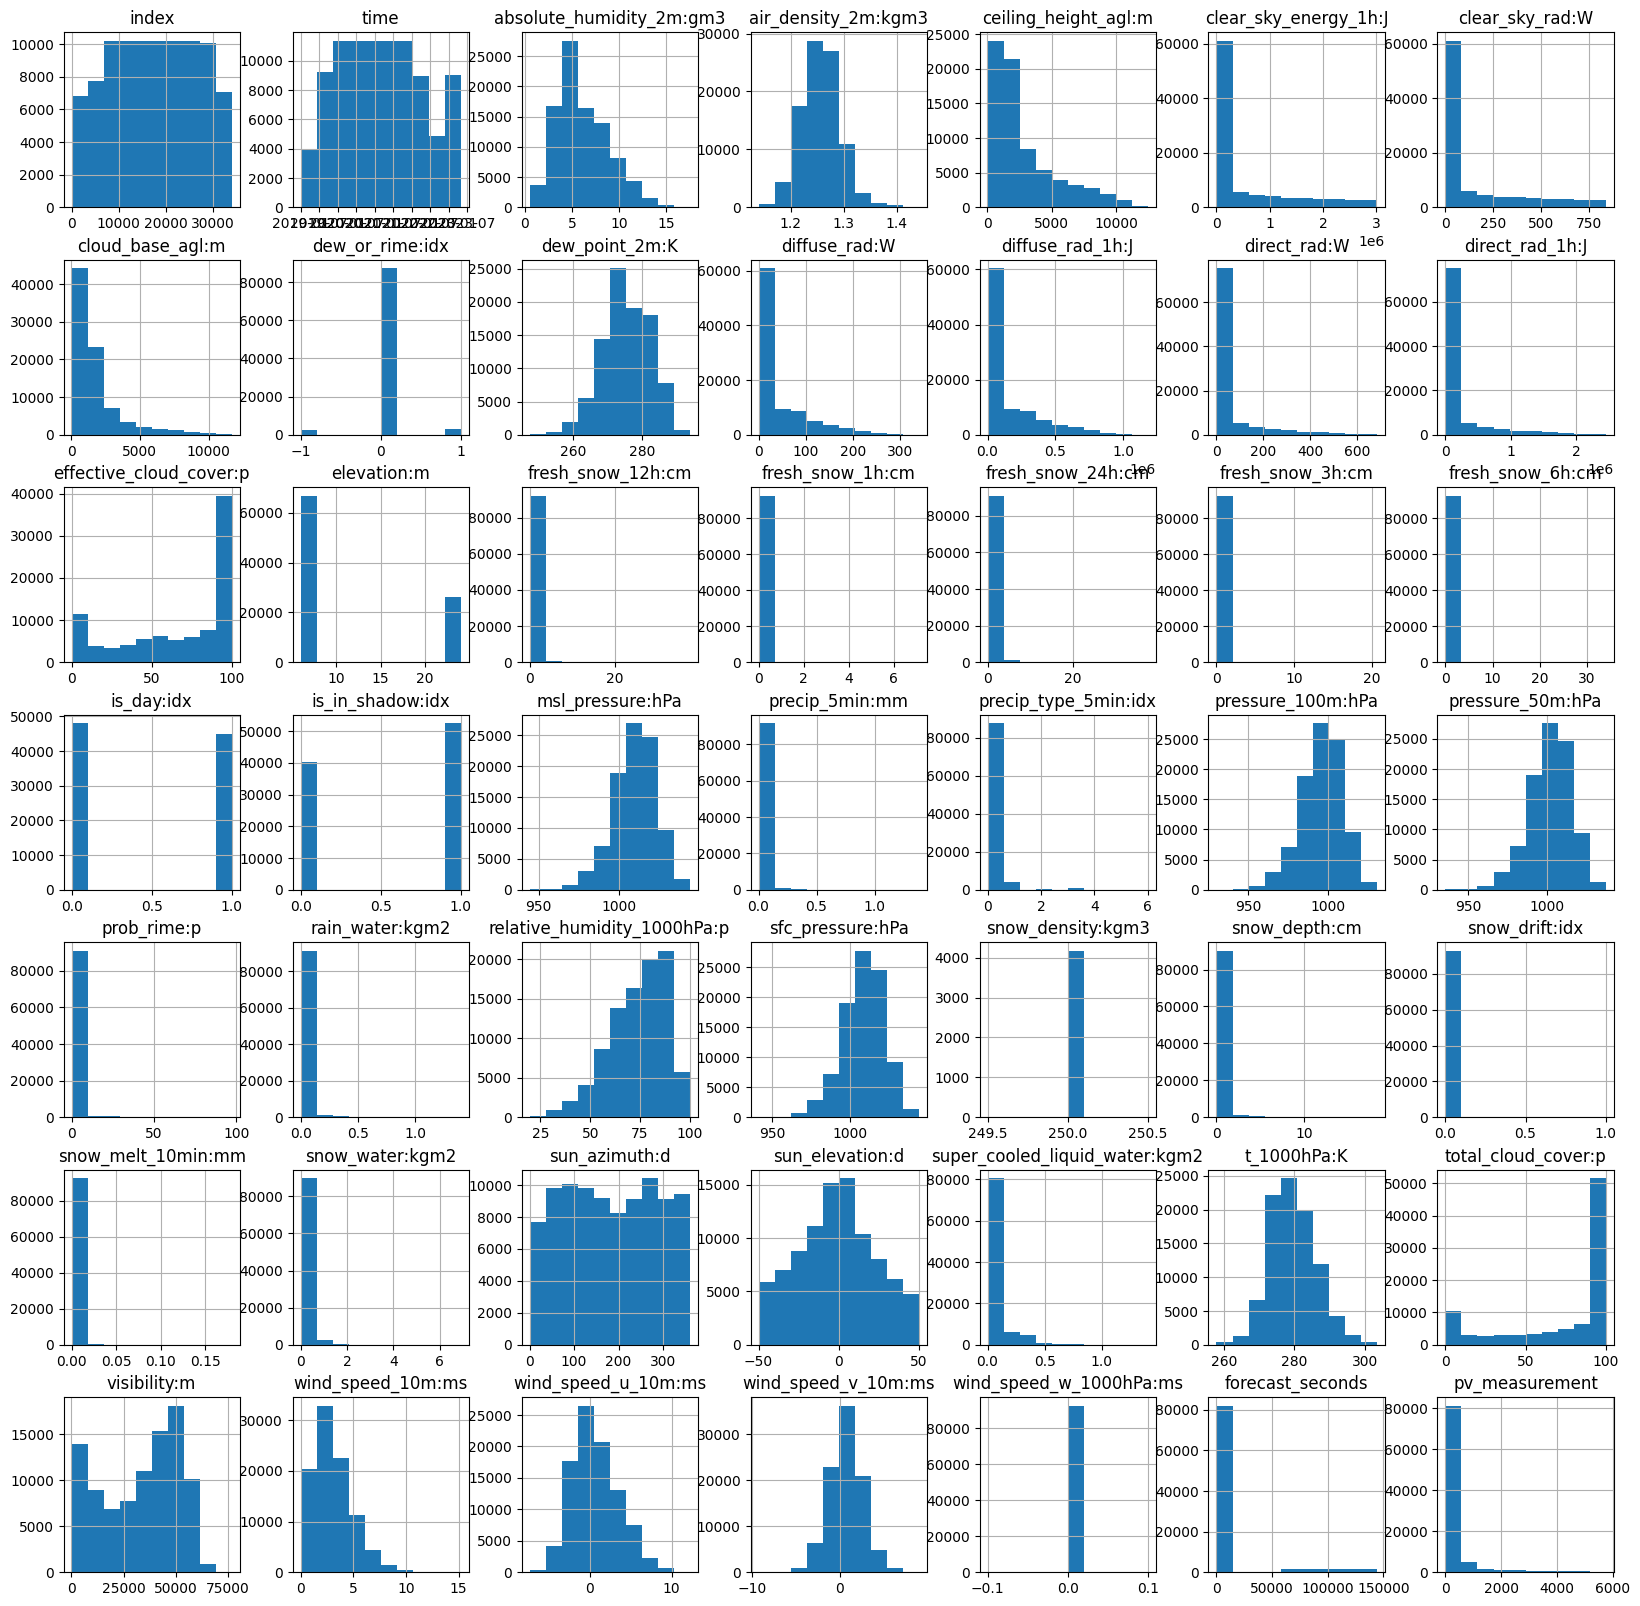

In [12]:
train_data.hist(figsize=(20,20));

In [13]:
train_data.corr()

<ipython-input-13-8d2cc80a8830>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,index,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,forecast_seconds,pv_measurement
index,1.000000,-0.145540,0.167864,0.254637,-0.069203,-0.069041,0.047949,-0.015842,-0.148203,-0.044955,-0.045476,-0.044206,-0.044737,0.027825,0.107926,0.045100,0.025189,0.054924,0.030949,0.036423,-0.050364,0.056619,0.082253,0.021409,0.103873,0.069402,0.071260,0.030542,-0.007419,-0.036057,0.073104,NaN,-0.108066,-0.008551,-0.019708,-0.010182,0.000194,-0.073119,-0.058399,-0.148465,0.018618,-0.009301,0.007574,-0.011676,0.024486,-0.000297,0.535089,-0.041903
absolute_humidity_2m:gm3,-0.145540,1.000000,-0.797672,0.056896,0.359761,0.357098,0.010260,0.180265,0.972589,0.284150,0.289767,0.242579,0.246231,0.048249,-0.070847,-0.129365,-0.079852,-0.157966,-0.094613,-0.108321,0.294731,-0.310797,0.128654,0.072123,-0.027200,0.153082,0.142495,-0.117420,0.272739,0.180483,0.131930,NaN,-0.193853,-0.003704,-0.025898,0.048793,0.023980,0.415869,0.143754,0.897826,0.067374,-0.201754,-0.117196,0.095393,-0.242426,0.010823,-0.223217,0.212681
air_density_2m:kgm3,0.167864,-0.797672,1.000000,-0.127542,-0.453309,-0.442597,-0.097252,-0.145458,-0.833154,-0.381310,-0.393978,-0.364784,-0.379367,-0.111764,0.023794,0.065483,0.047025,0.079868,0.053995,0.059353,-0.354195,0.372061,0.317095,-0.091481,-0.013444,0.295131,0.306565,0.152719,-0.173981,0.098466,0.317914,NaN,0.237064,0.002606,0.001262,-0.081786,-0.062348,-0.462417,-0.092029,-0.903782,-0.140822,0.039785,-0.069315,-0.014899,0.115348,0.028788,0.213174,-0.275082
ceiling_height_agl:m,0.254637,0.056896,-0.127542,1.000000,0.088259,0.081028,0.701991,0.003155,0.045568,0.096836,0.100701,0.257646,0.267231,-0.327214,0.017183,-0.025641,-0.018047,-0.028966,-0.022033,-0.024615,0.054352,-0.059084,0.065435,0.003458,-0.047422,0.067563,0.065756,0.030476,-0.138546,-0.386730,0.063932,NaN,-0.068153,-0.002194,-0.033342,-0.176295,0.052162,0.077311,-0.329274,0.215741,0.036351,0.420141,-0.140898,-0.294816,0.030255,-0.016615,0.062378,0.125216
clear_sky_energy_1h:J,-0.069203,0.359761,-0.453309,0.088259,1.000000,0.992337,0.064072,-0.017802,0.360839,0.913255,0.922609,0.738137,0.748593,-0.013108,-0.036236,-0.067280,-0.049877,-0.081030,-0.058651,-0.063854,0.646859,-0.704194,0.149365,-0.009606,-0.034741,0.157387,0.151310,-0.087234,0.052001,-0.331956,0.145231,NaN,-0.080509,-0.002912,-0.016107,-0.038655,0.035659,0.828396,0.016918,0.439184,-0.005446,0.050680,0.009216,0.067990,-0.343008,0.016098,-0.103305,0.581296
clear_sky_rad:W,-0.069041,0.357098,-0.442597,0.081028,0.992337,1.000000,0.060515,-0.017463,0.357996,0.919272,0.914782,0.745419,0.744332,-0.012701,-0.036162,-0.065318,-0.049422,-0.080757,-0.057499,-0.062282,0.647473,-0.708430,0.149946,-0.010532,-0.034717,0.157658,0.151722,-0.086568,0.050623,-0.307366,0.145785,NaN,-0.080115,-0.002905,-0.016443,-0.039829,-0.014539,0.831881,0.017627,0.425486,-0.005513,0.042309,-0.000404,0.063438,-0.329003,0.014590,-0.105090,0.596610
cloud_base_agl:m,0.047949,0.010260,-0.097252,0.701991,0.064072,0.060515,1.000000,-0.006511,-0.001173,0.048240,0.051910,0.231630,0.238547,-0.311400,0.003895,-0.028382,-0.020447,-0.025083,-0.025785,-0.029102,0.027388,-0.030914,0.049596,-0.021210,-0.068692,0.052627,0.051147,0.038017,-0.102913,-0.437320,0.049657,NaN,-0.041350,0.000158,-0.024922,-0.122517,0.039212,0.

# Pycaret regression

Import pycaret

In [15]:
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

ImportError: ignored

Setup model

In [ ]:
exp.setup(train_data, target = 'pv_measurement')

In [ ]:
exp.compare_models()

# Pytorch nerual network